In [1]:
print("Hello, Data Analysis!")


Hello, Data Analysis!


In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv('retail_sales.csv')

# Preview the first 5 rows
print(data.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [3]:
print(data.head(10))


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
5       6  CA-2015-115812    9/6/2015  14/06/2015  Standard Class    BH-11710   
6       7  CA-2015-115812    9/6/2015  14/06/2015  Standard Class    BH-11710   
7       8  CA-2015-115812    9/6/2015  14/06/2015  Standard Class    BH-11710   
8       9  CA-2015-115812    9/6/2015  14/06/2015  Standard Class    BH-11710   
9      10  CA-2015-115812    9/6/2015  14/06/2015  Standard Class    BH-11710   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  

In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
 18  Unnamed:

In [5]:
print(data.describe())


            Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000


In [6]:
print(data.describe(include='all'))


             Row ID        Order ID Order Date   Ship Date       Ship Mode  \
count   9800.000000            9800       9800        9800            9800   
unique          NaN            4922       1230        1326               4   
top             NaN  CA-2018-100111   5/9/2017  26/09/2018  Standard Class   
freq            NaN              14         38          34            5859   
mean    4900.500000             NaN        NaN         NaN             NaN   
std     2829.160653             NaN        NaN         NaN             NaN   
min        1.000000             NaN        NaN         NaN             NaN   
25%     2450.750000             NaN        NaN         NaN             NaN   
50%     4900.500000             NaN        NaN         NaN             NaN   
75%     7350.250000             NaN        NaN         NaN             NaN   
max     9800.000000             NaN        NaN         NaN             NaN   

       Customer ID  Customer Name   Segment        Country     

In [7]:
print(data.columns)  # Lists all column names
print(data.shape)    # Shows the number of rows and columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Unnamed: 18'],
      dtype='object')
(9800, 19)


In [8]:
print(data.isnull().sum())


Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code        11
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Unnamed: 18      9799
dtype: int64


In [9]:
data['Sales'] = data['Sales'].fillna(data['Sales'].median())


In [10]:
data['Region'] = data['Region'].fillna(data['Region'].mode()[0])


In [12]:
print(data.duplicated().sum())


0


In [13]:
data = data.drop_duplicates()


In [14]:
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


<Axes: ylabel='Sales'>

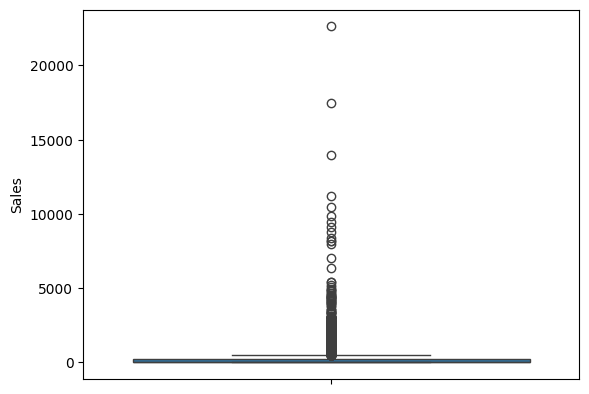

In [15]:
import seaborn as sns
sns.boxplot(data['Sales'])


In [16]:
data = data[data['Sales'] < data['Sales'].quantile(0.99)]


In [17]:
data['Sales'] = data['Sales'].clip(upper=data['Sales'].quantile(0.99))


In [18]:
data.to_csv('retail_sales_backup.csv', index=False)


In [19]:
print(data['Region'].value_counts())


Region
West       3111
East       2751
Central    2259
South      1581
Name: count, dtype: int64


In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('retail_sales.csv')

# Check the first few rows of the 'Order Date' column
print(data['Order Date'].head())

# Convert 'Order Date' to datetime with day-first format
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

# Verify the conversion
print(data['Order Date'].head())


0     8/11/2017
1     8/11/2017
2     12/6/2017
3    11/10/2016
4    11/10/2016
Name: Order Date, dtype: object
0   2017-11-08
1   2017-11-08
2   2017-06-12
3   2016-10-11
4   2016-10-11
Name: Order Date, dtype: datetime64[ns]


In [7]:
data['Month'] = data['Order Date'].dt.to_period('M')


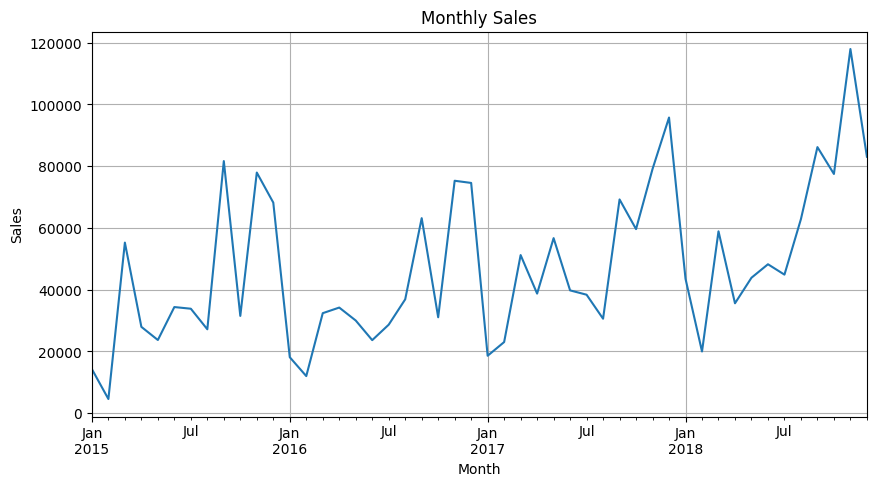

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, if used in other visualizations

# Assuming 'data' already has the 'Month' column
monthly_sales = data.groupby('Month')['Sales'].sum()

# Plotting the monthly sales trend
monthly_sales.plot(kind='line', title='Monthly Sales', xlabel='Month', ylabel='Sales', figsize=(10, 5))
plt.grid(True)  # This line requires plt to be imported
plt.show()


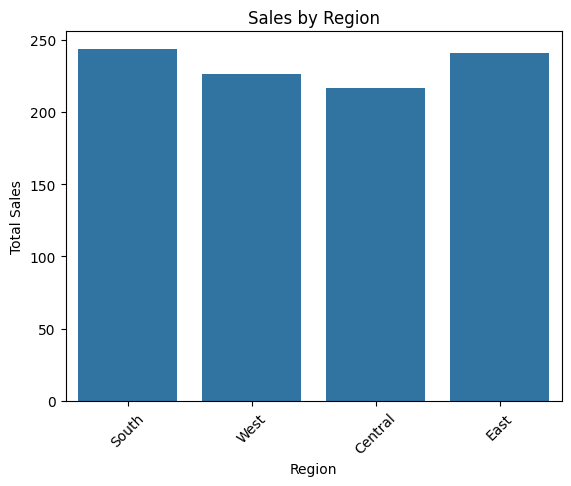

In [11]:
import seaborn as sns
sns.barplot(x='Region', y='Sales', data=data, errorbar=None)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


<Axes: xlabel='Region', ylabel='Sales'>

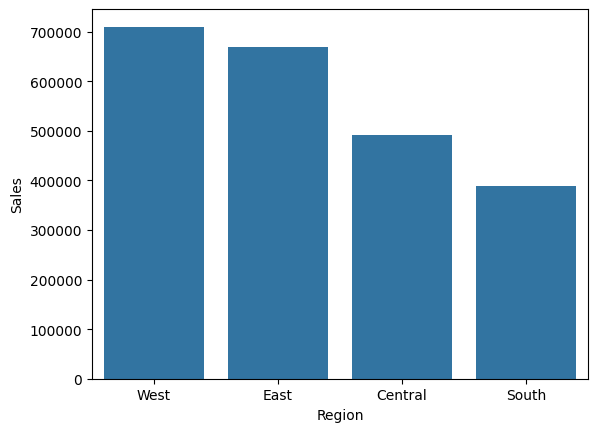

In [13]:
region_sales = data.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
sns.barplot(x='Region', y='Sales', data=region_sales, errorbar=None)


In [14]:
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)


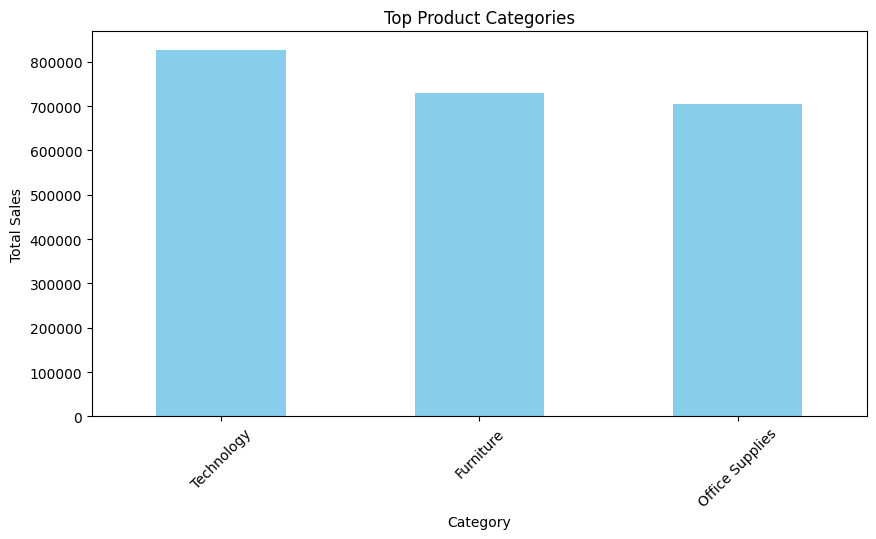

In [15]:
category_sales.plot(kind='bar', title='Top Product Categories', xlabel='Category', ylabel='Total Sales', figsize=(10, 5), color='skyblue')
plt.xticks(rotation=45)
plt.show()


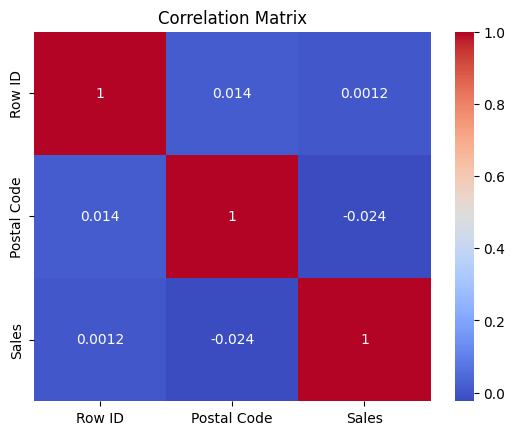

In [17]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation = numeric_data.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [18]:
print(data.dtypes)


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Unnamed: 18              object
Month                 period[M]
dtype: object


In [24]:
print(data.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Unnamed: 18', 'Month'],
      dtype='object')


In [25]:
top_products = data.groupby('Product Name')['Sales'].sum().nlargest(10)


In [26]:
print(data.head())


   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category 

In [27]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [28]:
data = pd.read_csv('retail_sales.csv')
print(data.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [29]:
print(data.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Unnamed: 18'],
      dtype='object')


In [30]:
top_products = data.groupby('Product Name')['Sales'].sum().nlargest(10)


In [31]:
print(data.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

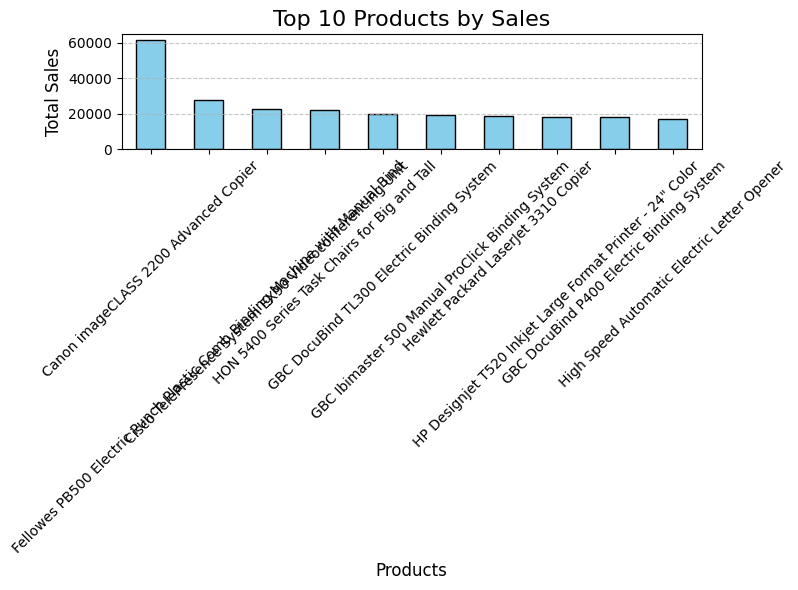

In [34]:
import matplotlib.pyplot as plt

# Group data by Product and sum Sales
top_products = data.groupby('Product Name')['Sales'].sum().nlargest(10)

# Plot the bar chart
top_products.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 6))
plt.title('Top 10 Products by Sales', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Products', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [38]:
print(data.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Unnamed: 18'],
      dtype='object')


In [39]:
# Inspect DataFrame structure
print(data.columns)
print(data.dtypes)

# Verify 'Order Date' and create 'Month'
if 'Order Date' in data.columns:
    data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
    data['Month'] = data['Order Date'].dt.to_period('M')

# Check and clean 'Region'
if 'Region' in data.columns:
    print(data['Region'].isnull().sum())
    data = data.dropna(subset=['Region'])

# Check and clean 'Sales'
if 'Sales' in data.columns:
    data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
    print(data['Sales'].isnull().sum())
    data = data.dropna(subset=['Sales'])

# Create pivot table
pivot_table = data.pivot_table(index='Month', columns='Region', values='Sales', aggfunc='sum')
print(pivot_table)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Unnamed: 18'],
      dtype='object')
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Unnamed: 18       object
dtype: object
0
0
Region      Central       East       South        West
Month                                                 
2015-01   9737.2390   3551.608   2903.6980   3353.6180
2015-02   2428.0720   2705.074   5298.1900   1247.6

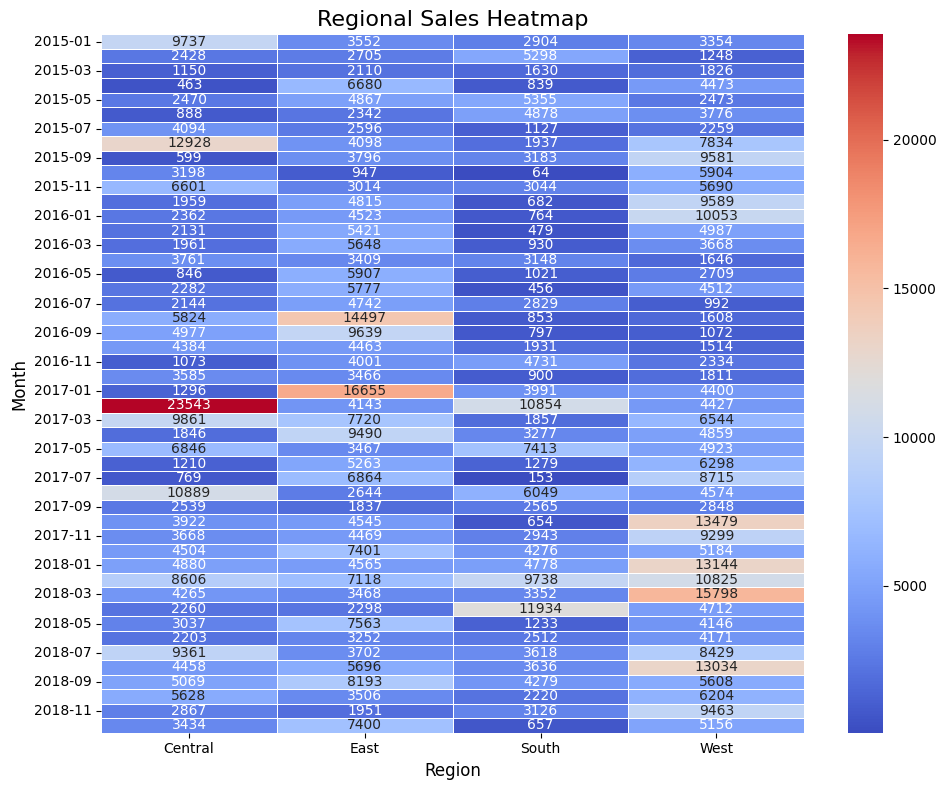

In [40]:
import seaborn as sns

# Create a pivot table
pivot_table = data.pivot_table(index='Month', columns='Region', values='Sales', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Regional Sales Heatmap', fontsize=16)
plt.ylabel('Month', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [41]:
(data.groupby('Region')['Sales'].sum())

Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64

In [42]:
(data.groupby('Month')['Sales'].sum())

Month
2015-01    19546.1630
2015-02    11678.9940
2015-03     6716.0440
2015-04    12455.4820
2015-05    15165.0510
2015-06    11884.1690
2015-07    10075.7400
2015-08    26797.7630
2015-09    17158.9320
2015-10    10112.6410
2015-11    18349.7640
2015-12    17045.8427
2016-01    17701.6864
2016-02    13018.3150
2016-03    12207.4066
2016-04    11963.6960
2016-05    10483.4820
2016-06    13026.6682
2016-07    10706.7200
2016-08    22782.5770
2016-09    16484.9010
2016-10    12293.0380
2016-11    12139.0395
2016-12     9761.3330
2017-01    26342.5410
2017-02    42967.9150
2017-03    25982.2870
2017-04    19472.1640
2017-05    22649.3888
2017-06    14050.1430
2017-07    16501.0070
2017-08    24156.3226
2017-09     9789.6620
2017-10    22599.7820
2017-11    20378.2400
2017-12    21365.1485
2018-01    27367.5920
2018-02    36285.9360
2018-03    26882.9530
2018-04    21203.6070
2018-05    15979.1570
2018-06    12138.1558
2018-07    25110.4795
2018-08    26823.6900
2018-09    23148.8700
2018

In [43]:
(data.groupby('Category')['Sales'].sum())

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

In [44]:
print("Total sales by region:\n", data.groupby('Region')['Sales'].sum())


Total sales by region:
 Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


In [45]:
# Monthly sales trend
monthly_sales = data.groupby('Month')['Sales'].sum()
print(monthly_sales)


Month
2015-01    19546.1630
2015-02    11678.9940
2015-03     6716.0440
2015-04    12455.4820
2015-05    15165.0510
2015-06    11884.1690
2015-07    10075.7400
2015-08    26797.7630
2015-09    17158.9320
2015-10    10112.6410
2015-11    18349.7640
2015-12    17045.8427
2016-01    17701.6864
2016-02    13018.3150
2016-03    12207.4066
2016-04    11963.6960
2016-05    10483.4820
2016-06    13026.6682
2016-07    10706.7200
2016-08    22782.5770
2016-09    16484.9010
2016-10    12293.0380
2016-11    12139.0395
2016-12     9761.3330
2017-01    26342.5410
2017-02    42967.9150
2017-03    25982.2870
2017-04    19472.1640
2017-05    22649.3888
2017-06    14050.1430
2017-07    16501.0070
2017-08    24156.3226
2017-09     9789.6620
2017-10    22599.7820
2017-11    20378.2400
2017-12    21365.1485
2018-01    27367.5920
2018-02    36285.9360
2018-03    26882.9530
2018-04    21203.6070
2018-05    15979.1570
2018-06    12138.1558
2018-07    25110.4795
2018-08    26823.6900
2018-09    23148.8700
2018

In [46]:
# Total sales by region
regional_sales = data.groupby('Region')['Sales'].sum()
print(regional_sales)


Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


In [47]:
# Total sales by category
category_sales = data.groupby('Category')['Sales'].sum()
print(category_sales)


Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64


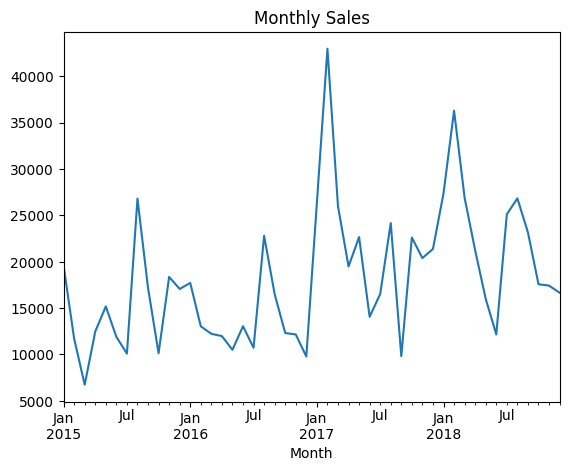

In [48]:
# Save monthly sales plot
monthly_sales.plot(kind='line', title='Monthly Sales')
plt.savefig('monthly_sales.png')


In [2]:
import pandas as pd

# Load the dataset (Make sure the CSV file path is correct)
data = pd.read_csv('retail_sales.csv')

# Check if the data has been loaded correctly
print(data.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [3]:
# Check the column names
print(data.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Unnamed: 18'],
      dtype='object')


In [8]:
# Convert 'Order Date' to datetime format, specifying that day comes before month
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

# Check the result
print(data['Order Date'].head())


0   2017-11-08
1   2017-11-08
2   2017-06-12
3   2016-10-11
4   2016-10-11
Name: Order Date, dtype: datetime64[ns]


In [9]:
# Convert 'Order Date' to datetime format if it's not already
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract the month from the 'Order Date' column
data['Month'] = data['Order Date'].dt.to_period('M')

# Now, run the grouping and summing operation
monthly_sales = data.groupby('Month')['Sales'].sum()
print("Monthly Sales:\n", monthly_sales)


Monthly Sales:
 Month
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     75249.3995
2016-12     74543.6012
2017-01     18542.4910
2017-02     22978.8150
2017-03     51165.0590
2017-04     38679.7670
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     43476.4740
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     

In [10]:
monthly_sales = data.groupby('Month')['Sales'].sum()
print("Monthly Sales:\n", monthly_sales)


Monthly Sales:
 Month
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     75249.3995
2016-12     74543.6012
2017-01     18542.4910
2017-02     22978.8150
2017-03     51165.0590
2017-04     38679.7670
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     43476.4740
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     

In [11]:
regional_sales = data.groupby('Region')['Sales'].sum()
print("Total Sales by Region:\n", regional_sales)


Total Sales by Region:
 Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


In [13]:
product_sales = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
print("Top Products by Sales:\n", product_sales.head(10))


Top Products by Sales:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


In [16]:
total_sales = data['Sales'].sum()
print("Total Sales:", total_sales)


Total Sales: 2261536.7827000003


In [17]:
monthly_sales_pct = monthly_sales.pct_change() * 100
print("Monthly Growth (%):\n", monthly_sales_pct)


Monthly Growth (%):
 Month
2015-01            NaN
2015-02     -68.182562
2015-03    1121.396374
2015-04     -49.449412
2015-05     -15.274211
2015-06      45.163660
2015-07      -1.577349
2015-08     -19.726768
2015-09     200.999048
2015-10     -61.465286
2015-11     147.692389
2015-12     -12.502753
2016-01     -73.496058
2016-02     -33.849344
2016-03     170.589961
2016-04       5.612827
2016-05     -12.282252
2016-06     -21.229159
2016-07      21.224652
2016-08      28.698297
2016-09      71.473245
2016-10     -50.879192
2016-11     142.648125
2016-12      -0.937945
2017-01     -75.125308
2017-02      23.925178
2017-03     122.661869
2017-04     -24.401989
2017-05      46.476860
2017-06     -29.885891
2017-07      -3.533596
2017-08     -20.298601
2017-09     126.550118
2017-10     -13.889127
2017-11      32.699683
2017-12      21.086840
2018-01     -54.588601
2018-02     -54.179823
2018-03     195.484265
2018-04     -39.619692
2018-05      23.307898
2018-06       9.959265
2018-07

In [18]:
regional_contribution = (regional_sales / total_sales) * 100
print("Regional Contribution (%):\n", regional_contribution)


Regional Contribution (%):
 Region
Central    21.783723
East       29.604591
South      17.207390
West       31.404295
Name: Sales, dtype: float64


In [19]:
print("### Regional Sales Performance ###\n")
print("Total Sales by Region:\n", regional_sales)


### Regional Sales Performance ###

Total Sales by Region:
 Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


In [20]:
monthly_sales.to_csv('monthly_sales_summary.csv')


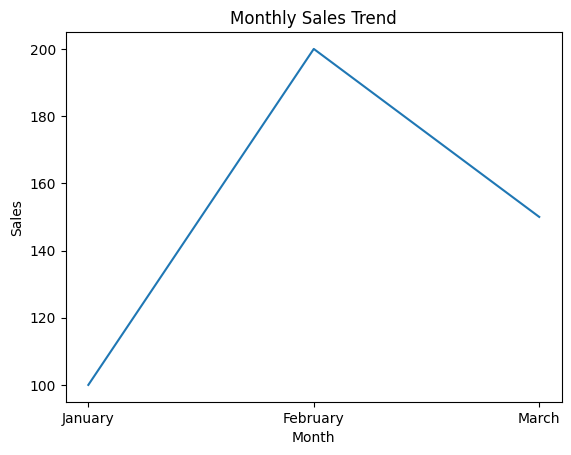

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data
data = {'Month': ['January', 'February', 'March'], 'Sales': [100, 200, 150]}
df = pd.DataFrame(data)

# Create a plot
plt.plot(df['Month'], df['Sales'])
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')

# Save the plot to a file
plt.savefig('monthly_sales_trend.png')


In [29]:
import pandas as pd

# Load the dataset (Make sure the CSV file path is correct)
data = pd.read_csv('retail_sales.csv')

# Check if the data has been loaded correctly
print(data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [31]:
# Check the column names in your dataset
print(data.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Unnamed: 18'],
      dtype='object')


In [32]:
# Rename the column if necessary
data.rename(columns={'order_date': 'Order Date'}, inplace=True)


In [39]:
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)


In [40]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')


In [41]:
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True, errors='coerce')


In [42]:
# Ensure the 'Order Date' column is in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])


In [43]:
# Extract month and year for grouping
data['Month'] = data['Order Date'].dt.to_period('M')


In [44]:
# Group by month and sum sales
monthly_sales = data.groupby('Month')['Sales'].sum()
print(monthly_sales)


Month
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     75249.3995
2016-12     74543.6012
2017-01     18542.4910
2017-02     22978.8150
2017-03     51165.0590
2017-04     38679.7670
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     43476.4740
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     44825.1040
2018-

In [45]:
print("Peak month:", monthly_sales.idxmax(), "with sales of $", monthly_sales.max())
print("Lowest month:", monthly_sales.idxmin(), "with sales of $", monthly_sales.min())


Peak month: 2018-11 with sales of $ 117938.155
Lowest month: 2015-02 with sales of $ 4519.892


In [46]:
# Group by region and sum sales
regional_sales = data.groupby('Region')['Sales'].sum()
print(regional_sales)


Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


In [47]:
# Calculate percentage contribution
total_sales = regional_sales.sum()
regional_sales_percentage = (regional_sales / total_sales) * 100
print(regional_sales_percentage)


Region
Central    21.783723
East       29.604591
South      17.207390
West       31.404295
Name: Sales, dtype: float64


In [48]:
print("Top region:", regional_sales.idxmax(), "with sales contribution of", regional_sales_percentage.max(), "%")


Top region: West with sales contribution of 31.404295076380933 %


In [49]:
# Group by category and sum sales
category_sales = data.groupby('Category')['Sales'].sum()
print(category_sales)


Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64


In [50]:
print("Top category:", category_sales.idxmax(), "with sales of $", category_sales.max())


Top category: Technology with sales of $ 827455.873


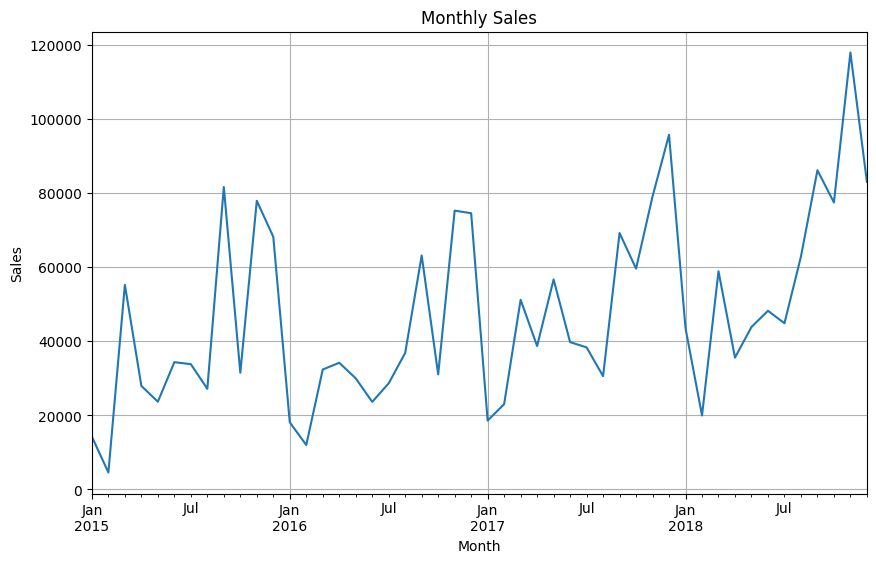

In [57]:
import matplotlib.pyplot as plt
# Plot monthly sales trend
monthly_sales.plot(kind='line', title='Monthly Sales', ylabel='Sales', xlabel='Month', figsize=(10, 6))
plt.grid(True)
plt.savefig('monthly_sales.png')
plt.show()


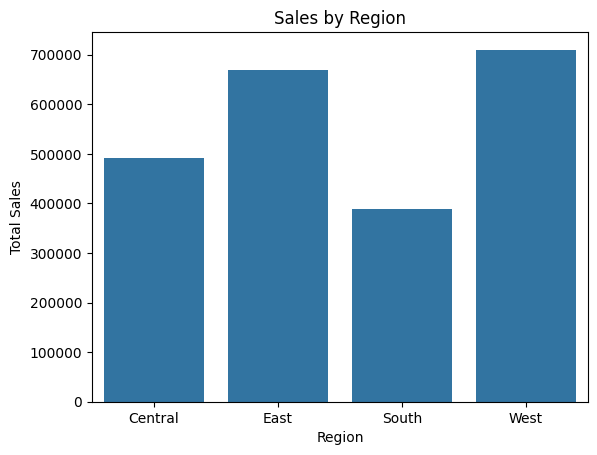

In [52]:
import seaborn as sns
# Plot regional sales
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.savefig('regional_sales.png')
plt.show()


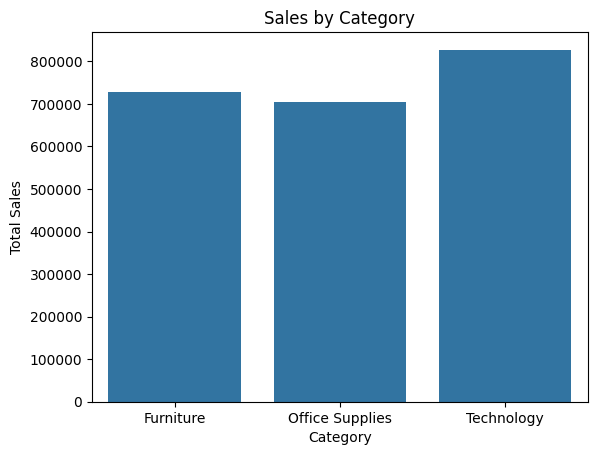

In [53]:
# Plot sales by category
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.savefig('category_sales.png')
plt.show()


In [60]:
import pandas as pd

# Load the dataset
data = pd.read_csv('retail_sales.csv')

# Ensure the data has a 'Product' and 'Sales' column
print(data.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Unnamed: 18'],
      dtype='object')


In [62]:
# Group by product and sum sales
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Preview the top 10 products
print(top_products)


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


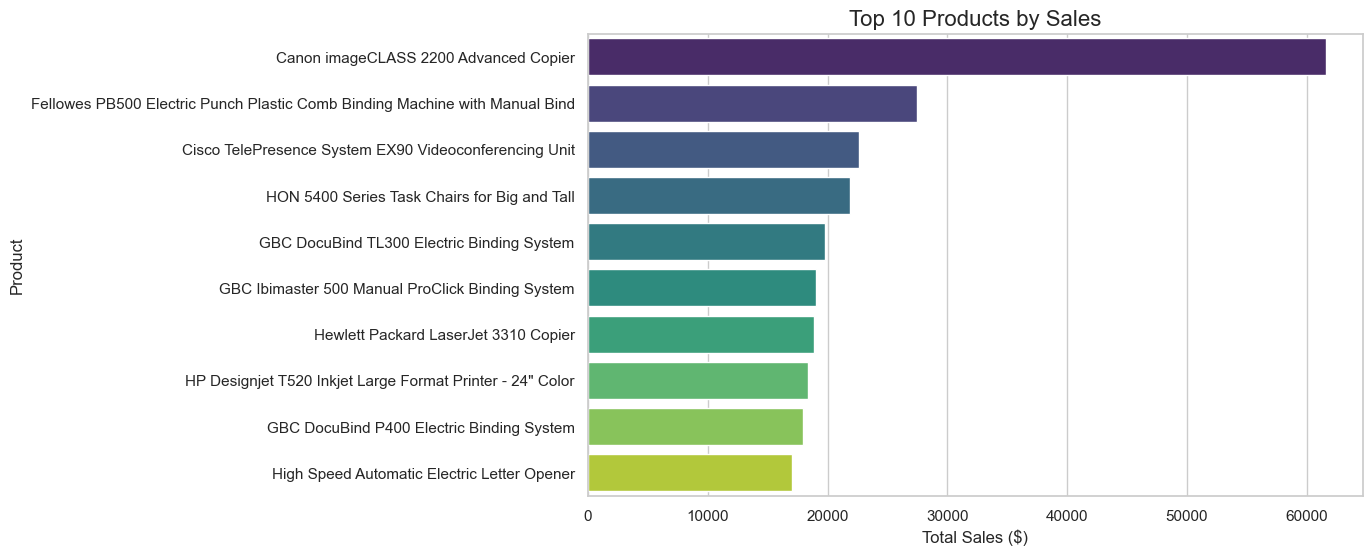

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot for the top 10 products by sales
plt.figure(figsize=(10, 6))

# Update the code to assign 'Product' to hue, and palette to 'viridis'
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis", hue=top_products.index, legend=False)

# Add title and labels
plt.title('Top 10 Products by Sales', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product', fontsize=12)

# Show the plot
plt.show()


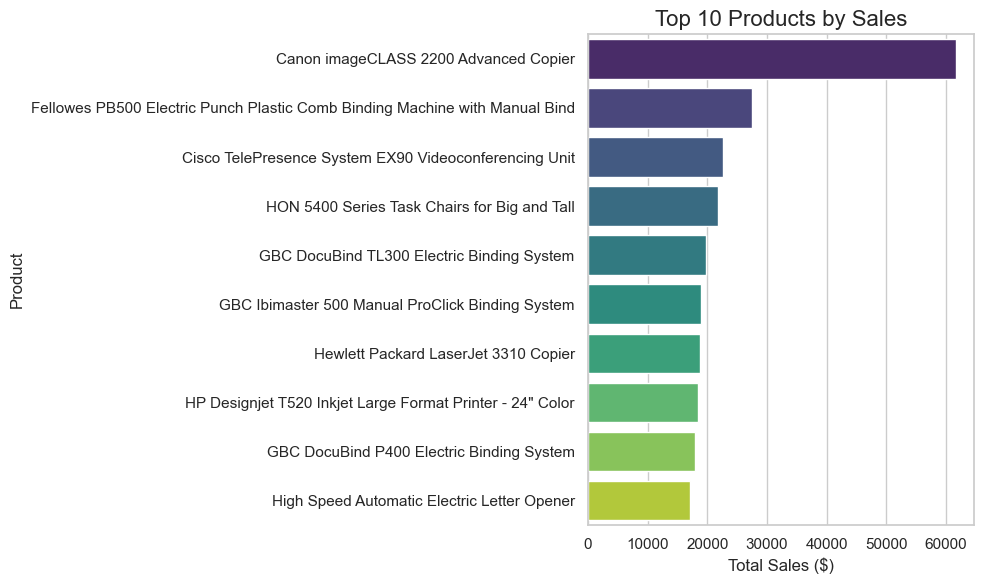

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot for the top 10 products by sales
plt.figure(figsize=(10, 6))

# Generate the bar plot
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis", hue=top_products.index, legend=False)

# Add title and labels
plt.title('Top 10 Products by Sales', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product', fontsize=12)

# Adjust layout to avoid clipping
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('top_10_products_sales.png', dpi=300, bbox_inches='tight')

# Display the plot (this step is not necessary but ensures the plot is rendered)
plt.show()
